In [2]:
from ipyparallel import Client
rc = Client()


import os
path = os.path.dirname(os.getcwd())

rc[:].push({'path':path})

<AsyncResult: _push>

nodes visited   76
cache space     30000034
nodes stored    63
nodes forgotten 0
current depth   0
current node    
role: max
root  : work:        56, INF    won, INF    not lost,      0 not won,      0 lost

role: min
(3, 6): work:        56, INF    won, INF    not lost,      0 not won,      0 lost

time 0.00844050753147

(3, 6)(0, 2)
	(1, 7)(5, 5)
		(7, 6)(4, 2)
			(4, 7)(5, 3)
				(6, 1)(0, 4)
				(8, 1)(6, 5)


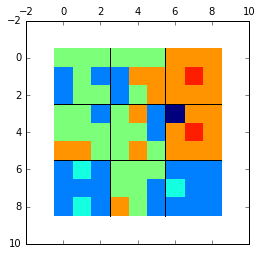

In [1]:
# %%px --targets 1
import sys

sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
import dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(1,4),(0,8),(2,6),(5,4),(4,6),(4,8),(6,6),(8,8)]:
    board[x]=1
for o in [(1,0),(2,0),(1,8),(2,8),(3,5),(6,0),(7,7),(8,7)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,4),(2,3),(7,0),(3,2),(0,7),(1,3),(5,1),(7,5),(3,8),(1,6),(5,0),(7,2),(5,8),(6,7),(1,5),
             (5,7),(8,3),(8,2),(7,8),(3,7),(2,5),(6,8),(0,6),(1,2),(5,6),(6,2),(2,7),(8,5),(8,6),(8,0),
             (7,1),(4,5)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,root = True,epsilon=1.1)
print 'time',time.clock() - t0
print tree

17677833834988926445
this node has 1 children
move:(7, 6), runs:  1409999, eval:-1.0000, principal:76 31 04 03 11 43 40 30 

76 31 04 03 11 43 40 30 
         96740 function calls in 3.975 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.433    3.433    3.975    3.975 {MC.mc_sim}
     1132    0.058    0.000    0.155    0.000 encoder.py:283(iterencode)
     7501    0.042    0.000    0.091    0.000 encoder.py:42(encode_basestring)
     1981    0.042    0.000    0.042    0.000 {method 'send' of 'zmq.backend.cython.socket.Socket' objects}
     7501    0.031    0.000    0.034    0.000 {method 'sub' of '_sre.SRE_Pattern' objects}
     1132    0.023    0.000    0.204    0.000 __init__.py:280(dumps)
      283    0.022    0.000    0.027    0.000 uuid.py:103(__init__)
      423    0.018    0.000    0.018    0.000 {zmq.backend.cython._poll.zmq_poll}
    17542    0.015    0.000    0.015    0.000 {isinstance}
     1269    

KeyboardInterrupt: 

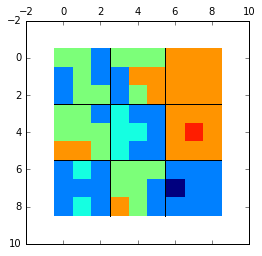

In [1]:
# %%px --targets 2
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
import dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(1,4),(0,8),(2,6),(5,4),(4,6),(4,8),(6,6),(8,8)]:
    board[x]=1
for o in [(1,0),(2,0),(1,8),(2,8),(3,5),(6,0),(7,7),(8,7)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,4),(2,3),(7,0),(3,2),(0,7),(1,3),(5,1),(7,5),(3,8),(1,6),(5,0),(7,2),(5,8),(6,7),(1,5),
             (5,7),(8,3),(8,2),(7,8),(3,7),(2,5),(6,8),(0,6),(1,2),(5,6),(6,2),(2,7),(8,5),(8,6),(8,0),
             (7,1),(4,5),(3,6),(0,2),(1,7),(5,5)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)
tact.fancy_board(game)

cProfile.run('mc_sim(root,game,branch = 50,passes = 100000000)',sort = 'tottime')



In [5]:
root.Q

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
%%px --targets 1
import sys
print path
sys.path.append(path)

print sys.path


C:\Users\Todd\Dropbox\games\tic_tactics games..
['', '', '', 'C:\\Anaconda2\\python27.zip', 'C:\\Anaconda2\\DLLs', 'C:\\Anaconda2\\lib', 'C:\\Anaconda2\\lib\\plat-win', 'C:\\Anaconda2\\lib\\lib-tk', 'C:\\Anaconda2', 'C:\\Anaconda2\\lib\\site-packages', 'C:\\Anaconda2\\lib\\site-packages\\Sphinx-1.3.5-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\win32', 'C:\\Anaconda2\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda2\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda2\\lib\\site-packages\\setuptools-20.7.0-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Todd\\Dropbox\\games\\tic_tactics games..', 'C:\\Users\\Todd\\Dropbox\\games\\tic_tactics games..', 'C:\\Users\\Todd\\Dropbox\\games\\tic_tactics games..', 'C:\\Users\\Todd\\Dropbox\\games\\tic_tactics games..', 'C:\\Users\\Todd\\Dropbox\\games\\tic_tactics games..']
